# AI Powered Recipe Recommendation System 

#### Introduction
In the world, where people are more health conscious and work driven, often face difficulty to prepare meals considering time, ingredients availability and dietary preferences. Although there are a millions of recipes available on internet, it requires efforts to find the one with fits with available resources. 

The objective of this project to utilize advanced technologies backed up with large dataset helps to generate customized meal suggestions based on user input.

#### Problem Statement:

The project's goal is to create a recipe recommendation system powered by AI that makes meal planning easier. A dataset containing 231638 recipes is filtered by ingredients, dietary restrictions, and time constraints to provide users with personalised food recommendations. Based on user choices, this system offers quick, customised meal selections.

### Rectangular dataset : Raw_Recipe.csv

In [27]:
import pandas as pd 

df = pd.read_csv('./Dataset/RAW_recipes.csv')
df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


**name** : The title of the recipe or dish

**id** : A unique identifier assigned to each recipe

**Minutes** : The total time required to prepare and cook the dish,it is measured in minutes.

**contributor_id** : A unique identifier for the person who submitted the recipe.

**submitted** : The date when the recipe was submitted. 

**tags** : A list of categorical labels or keywords associated with the recipe, such as the type of cuisine, ingredients, or occasion.

**nutrition** : A list of nutritional values represented in order

**n_steps** : The number of steps involved in the preparation and cooking process.

**steps** : A list describing each step of the recipe, such as how to prepare, season, and cook the dish. 

**description** : A brief overview or background information about the recipe. It may include personal notes from the contributor. 

**ingredients** : A list of ingredients required to prepare the dish. 

**n_ingredients** : The number of ingredients needed for the recipe. 

In [28]:
import pandas as pd

class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")

    # Summarize basic statistics
    def summarize_dataset(self):
        print(f"\r\n---> STEP 3 : Summarize basic statistics for columns \r\n")
        if self.data is not None:
            # Preparation time
            print("Data summary : Time to prepare the recepe in minutes \r\n")
            minutesSummary = self.data['minutes'].describe()
            print(f"Minimum \t:\t {minutesSummary['min']:.2f} minutes")
            print(f"Maximum \t:\t {minutesSummary['max']:.2f} minutes i.e {minutesSummary['max']/60:.2f} hours")
            print(f"Mean    \t:\t {minutesSummary['mean']:.2f} i.e {minutesSummary['mean']/60:.2f} hours")
            median_minute = self.data['minutes'].median()
            print(f"Median  \t:\t {median_minute:.2f} minutes i.e {median_minute/60:.2f} hours")
            mode_minute = self.data['minutes'].mode()
            print(f"Mode    \t:\t {mode_minute[0]:.2f} minutes i.e {mode_minute[0]/60:.2f} hours")
            mode_var = self.data['minutes'].var()
            print(f"variance\t:\t {mode_var:.2f} minutes")
            mode_std = self.data['minutes'].var()
            print(f"std. deviation\t:\t {mode_std:.2f} minutes")
            print(f"Quartiles(25%) \t:\t {self.data['minutes'].quantile(0.25)}")
            print(f"Quartiles(50%) \t:\t {self.data['minutes'].quantile(0.50)}")
            print(f"Quartiles(75%) \t:\t {self.data['minutes'].quantile(0.75)}")
            print(f"Quartiles(100%) \t:\t {self.data['minutes'].max()}")
            

            # Steps to perform
            print("\r\nData summary : Number of steps (Efforts to prepare) \r\n")
            stepsSummary = self.data['n_steps'].describe()
            print(f"Minimum \t:\t {stepsSummary['min']:.2f} steps")
            print(f"Maximum \t:\t {stepsSummary['max']:.2f} steps")
            print(f"Mean    \t:\t {stepsSummary['mean']:.2f} steps")
            median_steps = self.data['n_steps'].median()
            print(f"Median  \t:\t {median_steps:.2f} steps")
            mode_steps = self.data['n_steps'].mode()
            print(f"Mode    \t:\t {mode_steps[0]:.2f} steps")
            mode_varns = self.data['n_steps'].var()
            print(f"variance\t:\t {mode_varns:.2f} steps")
            mode_stdns = self.data['n_steps'].var()
            print(f"std. deviation\t:\t {mode_stdns:.2f} steps")
            print(f"Quartiles(25%) \t:\t {self.data['n_steps'].quantile(0.25)}")
            print(f"Quartiles(50%) \t:\t {self.data['n_steps'].quantile(0.50)}")
            print(f"Quartiles(75%) \t:\t {self.data['n_steps'].quantile(0.75)}")
            print(f"Quartiles(100%) \t:\t {self.data['n_steps'].max()}")

            # Ingrediants
            print("\r\nData summary : Required Ingrediants \r\n")
            stepsSummary = self.data['n_ingredients'].describe()
            print(f"Minimum \t:\t {stepsSummary['min']:.2f} ingrediants")
            print(f"Maximum \t:\t {stepsSummary['max']:.2f} ingrediants")
            print(f"Mean    \t:\t {stepsSummary['mean']:.2f} ingrediants")
            median_ing = self.data['n_ingredients'].median()
            print(f"Median  \t:\t {median_ing:.2f} ingrediants")
            mode_ing = self.data['n_ingredients'].mode()
            print(f"Mode    \t:\t {mode_ing[0]:.2f} ingrediants")
            mode_vari = self.data['n_ingredients'].var()
            print(f"variance\t:\t {mode_vari:.2f} ingrediants")
            mode_stdi = self.data['n_ingredients'].var()
            print(f"std. deviation\t:\t {mode_stdi:.2f} ingrediants")
            print(f"Quartiles(25%) \t:\t {self.data['n_ingredients'].quantile(0.25)}")
            print(f"Quartiles(50%) \t:\t {self.data['n_ingredients'].quantile(0.50)}")
            print(f"Quartiles(75%) \t:\t {self.data['n_ingredients'].quantile(0.75)}")
            print(f"Quartiles(100%) \t:\t {self.data['n_ingredients'].max()}")
        else:
            print("Unable to load Recepe data.")

if __name__ == "__main__":

    # Create an instance of the DataAnalytics class
    recepeData = RawRecipe()
    
    # Load data
    recepeData.load_data()

    # Check for missing values
    recepeData.check_null_values()

    # Get data summary
    recepeData.summarize_dataset()

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 

---> STEP 2 : Null Check for data 

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

---> STEP 3 : Summarize basic statistics for columns 

Data summary : Time to prepare the recepe in minutes 

Minimum 	:	 0.00 minutes
Maximum 	:	 2147483647.00 minutes i.e 35791394.12 hours
Mean    	:	 9398.55 i.e 156.64 hours
Median  	:	 40.00 minutes i.e 0.67 hours
Mode    	:	 30.00 minutes i.e 0.50 hours
variance	:	 19909114160156.79 minutes
std. deviation	:	 19909114160156.79 minutes
Quartiles(25%) 	:	 20.0
Quartiles(50%) 	:	 40.0
Quartiles(75%) 	:	 65.0
Quartiles(100%) 	:	 2147483647

Data summary : Number of steps (Efforts to prepare) 

Minimum

### Histogram : Preparation time destribution

- Most of the recepe require less than 1 hour to be prepared

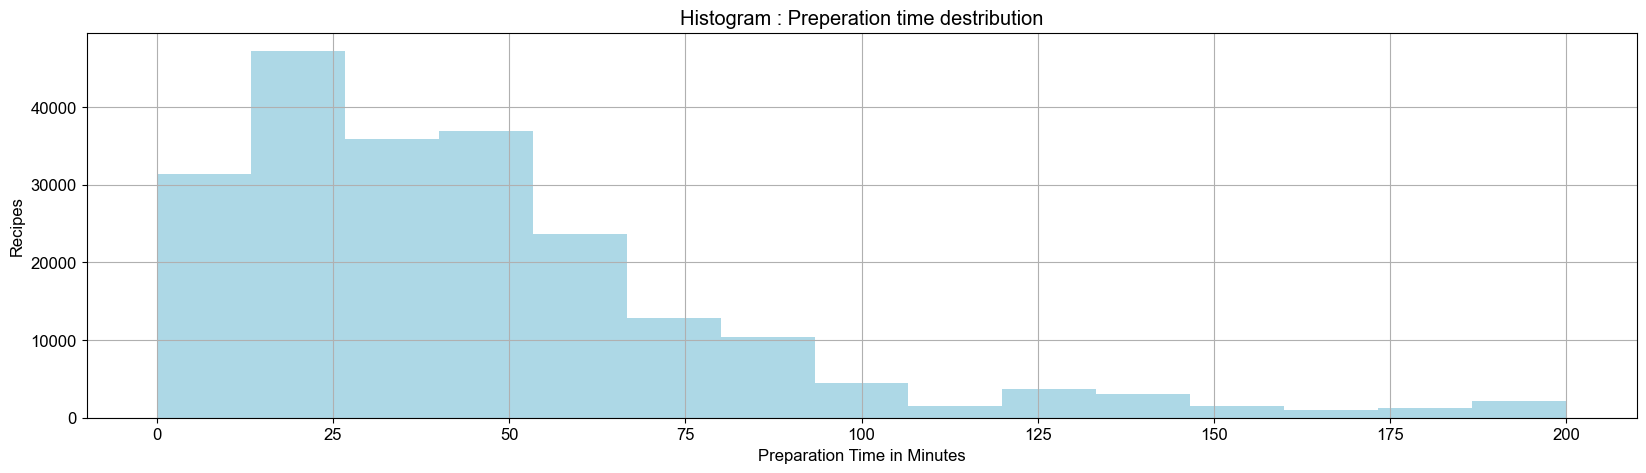

In [29]:
import matplotlib.pyplot as plt
# Load the dataset
# Create a histogram
plt.figure(figsize=(20, 5))
plt.hist(recepeData.data['minutes'], color='lightblue',histtype="stepfilled",bins=15, range=(0,200))

# Add title and labels
plt.title('Histogram : Preperation time destribution')
plt.xlabel('Preparation Time in Minutes')
plt.ylabel('Recipes')
plt.grid(True)

# Show the plot
plt.show()

### Histogram : Number of Ingrediants destribution

- Most of the recepe requires 8 to 15 ingrediants

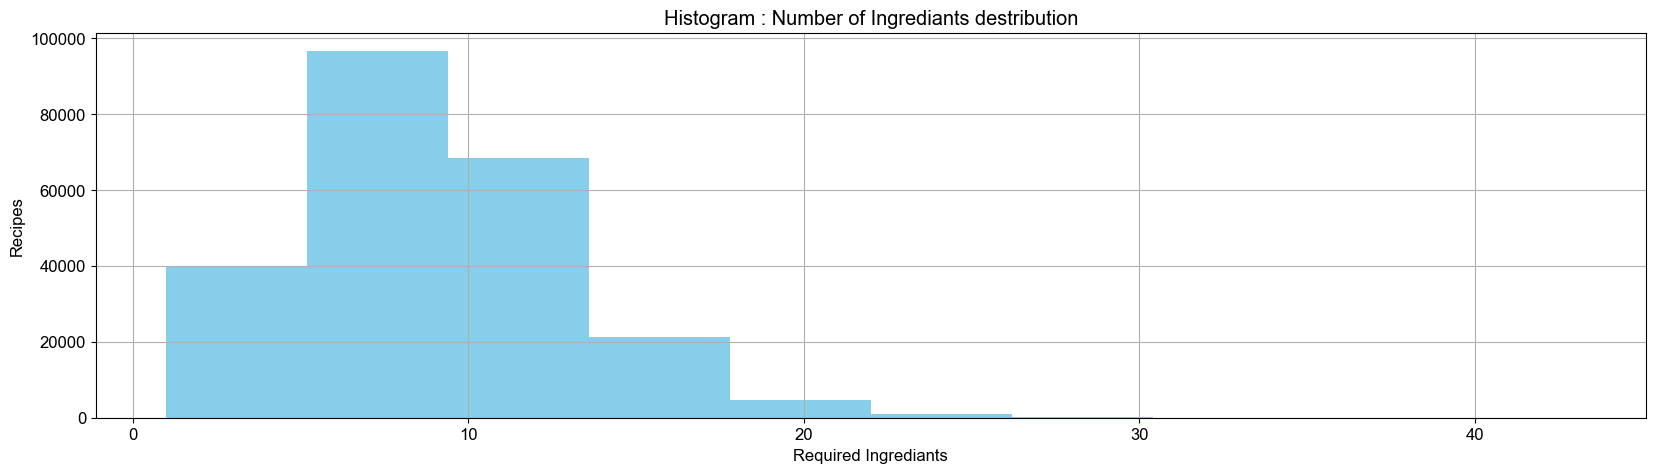

In [30]:

# Load the dataset
# Create a histogram
plt.figure(figsize=(20, 5))
plt.hist(recepeData.data['n_ingredients'], color='skyblue',histtype="stepfilled")

# Add title and labels
plt.title('Histogram : Number of Ingrediants destribution')
plt.xlabel('Required Ingrediants')
plt.ylabel('Recipes')
plt.grid(True)

# Show the plot
plt.show()

### Scatter Plot : Ingrediants vs Steps to perform

More steps needs to perform as more ingrediants are available

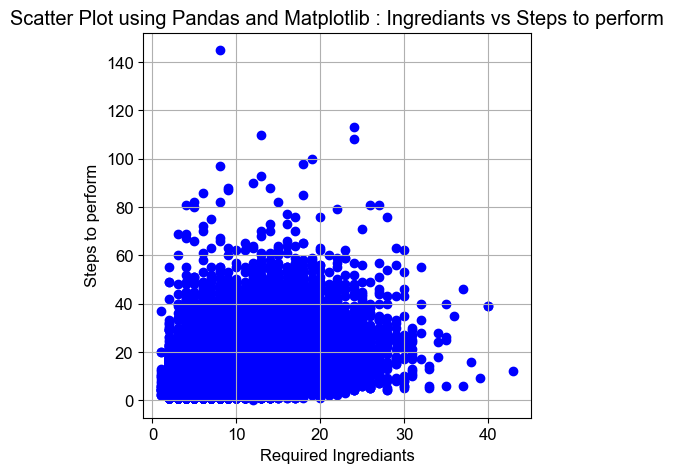

In [31]:
# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(recepeData.data['n_ingredients'], recepeData.data['n_steps'], color='b')
# Add title and labels
plt.title('Ingrediants vs Steps to perform')
plt.xlabel('Required Ingrediants')
plt.ylabel('Steps to perform')
plt.grid(True)

# Show the plot
plt.show()

### BoxPlot : 

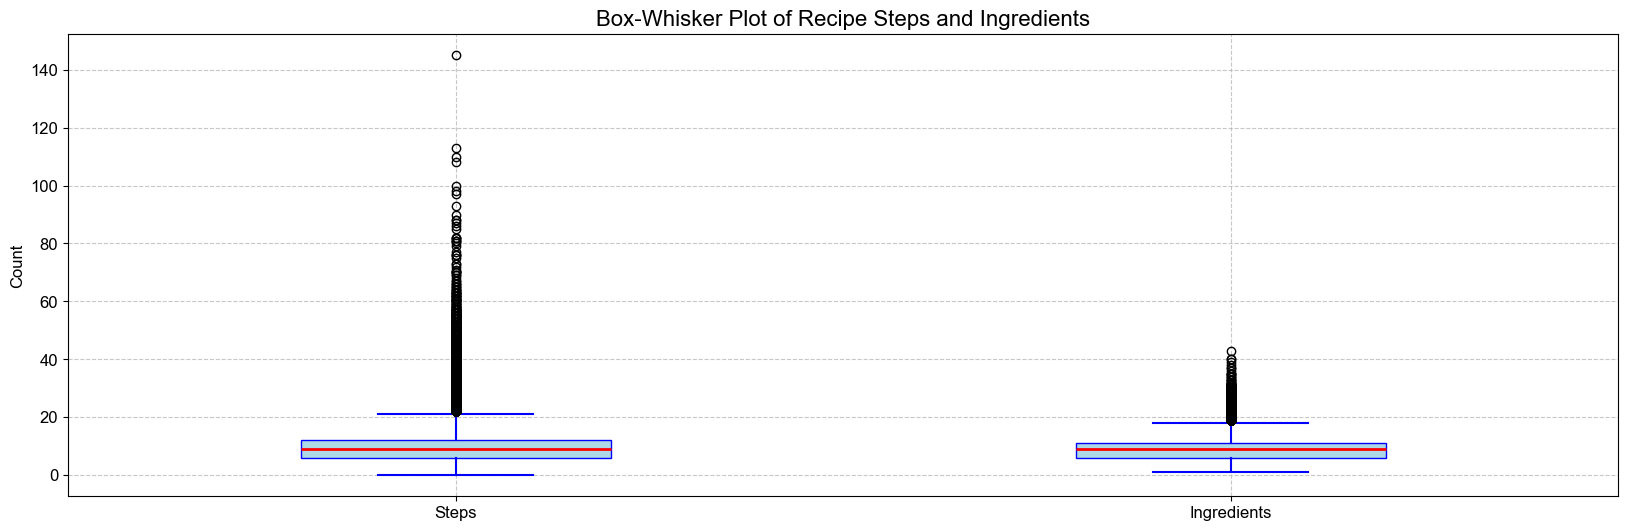

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./Dataset/RAW_recipes.csv')

# Create a figure with a defined size
plt.figure(figsize=(20, 6))

# Create the box plot with customized labels and improved visuals
plt.boxplot(
    [df['n_steps'], df['n_ingredients']], 
    widths=0.4, 
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='blue', linewidth=1.5),
    capprops=dict(color='blue', linewidth=1.5)
)

# Customize the plot further
plt.title('Box-Whisker Plot of Recipe Steps and Ingredients', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks([1, 2], ['Steps', 'Ingredients'], fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Venn Diagram

Our data is not interdependendt, so venn diagram is created for assignment display purpose only. It does not applied to our dataset.

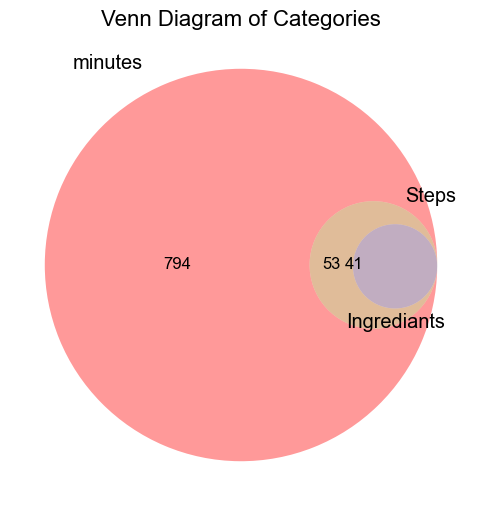

In [52]:
from matplotlib_venn import venn3

# Replace these with your actual column names
set1 = set(recepeData.data['minutes'])
set2 = set(recepeData.data['n_steps'])
set3 = set(recepeData.data['n_ingredients'])

# Create the Venn diagram
plt.figure(figsize=(6, 6))
venn3([set1, set2, set3], 
      set_labels=('minutes', 'Steps', 'Ingrediants'))

# Customize the plot
plt.title("Venn Diagram of Categories", fontsize=16)

# Add some styling
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

# Show the plot
plt.show()

### Recipe Contributors

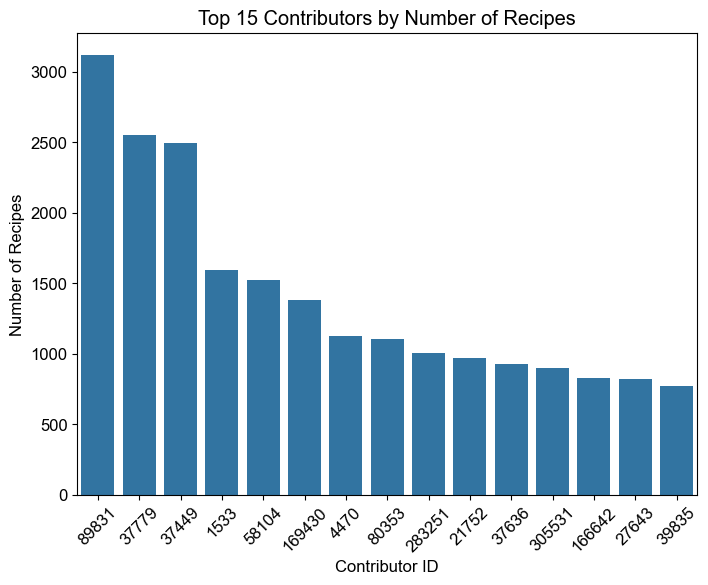

In [53]:
import seaborn as sns
contributor_counts = recepeData.data['contributor_id'].value_counts().head(15)

plt.figure(figsize=(8, 6))
sns.barplot(x=contributor_counts.index.astype(str), y=contributor_counts.values)
plt.title('Top 15 Contributors by Number of Recipes')
plt.xlabel('Contributor ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()



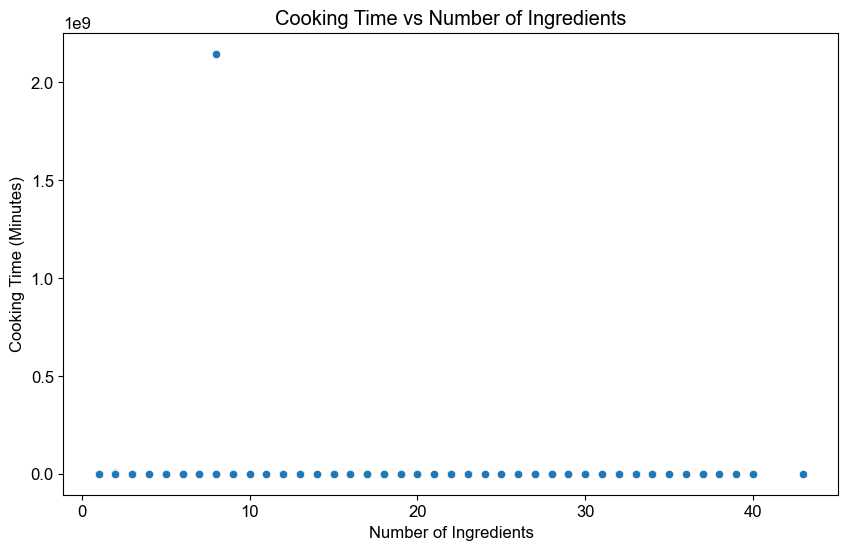

In [54]:
#Correlation Between Cooking Time and Number of Ingredients
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Dataset/RAW_recipes.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_ingredients', y='minutes', data=data,)
plt.title('Cooking Time vs Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Cooking Time (Minutes)')
plt.show()


### Numerical Summary Of Dataset
Statistical data summary from dataset explained and plotted above

In [21]:
recepeData.data.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000
